In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
np.unique(train['Survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train = train.loc[:, ~train.columns.isin(col)]

In [9]:
train.loc[:, 'Sex'] = train.loc[:, 'Sex'].replace({'male' : 1, 'female' : 0})
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [10]:
# Fazendo o OneHotEncoder da classe Embarked.

encoded_df = pd.get_dummies(train['Embarked'], columns=['Embarked']).astype(int)

print(encoded_df.value_counts())

C  Q  S
0  0  1    644
1  0  0    168
0  1  0     77
   0  0      2
Name: count, dtype: int64


In [11]:
train.drop(columns = ['Embarked'], inplace = True)
train = pd.concat([train, encoded_df], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [12]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
C             0
Q             0
S             0
dtype: int64

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [14]:
# Usando o KNN inputer para preencher os valores não nulos.

imputer = KNNImputer(n_neighbors = 5)
train = pd.DataFrame(imputer.fit_transform(train), columns = train.columns).astype(float)
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

In [15]:
# Escalonando os dados com MinMaxScaler : 
#scaler = MinMaxScaler()
#x = scaler.fit_transform(train.loc[:, ~train.columns.isin(['Survived'])])
#y = train.loc[:, 'Survived']

In [16]:
# Escalonando os dados com o StandardScaler : 

scaler = StandardScaler()
train.loc[:, ['Age', 'Fare']] = scaler.fit_transform(train.loc[:, ['Age', 'Fare']])

x = train.loc[:, ~train.columns.isin(['Survived'])]
y = train.loc[:, 'Survived']

In [17]:
data_norm = pd.DataFrame(np.column_stack((y, x)), columns = train.columns)

data_norm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1.0,-0.587949,1.0,0.0,-0.502445,0.0,0.0,1.0
1,1.0,1.0,0.0,0.582260,1.0,0.0,0.786845,1.0,0.0,0.0
2,1.0,3.0,0.0,-0.295397,0.0,0.0,-0.488854,0.0,0.0,1.0
3,1.0,1.0,0.0,0.362846,1.0,0.0,0.420730,0.0,0.0,1.0
4,0.0,3.0,1.0,0.362846,0.0,0.0,-0.486337,0.0,0.0,1.0


In [18]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   C         891 non-null    float64
 8   Q         891 non-null    float64
 9   S         891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [20]:
X_train.shape, X_test.shape

((712, 9), (179, 9))

In [21]:
%%time

# Criando o modelo classificador com o otimizador ADAM : 

mlp_with_adam = MLPClassifier(solver = 'adam', max_iter = 150)

n_neurons = [
    (i, j) for i in range(1, 10) for j in range(1, 5)
]+ [
    (i, j, k) for i in range(1, 10) for j in range(1, 10) for k in range(1, 5)
]

actv = ['logistic', 'tanh', 'relu', 'identity']

parameters = {'hidden_layer_sizes': n_neurons,
             'activation' : actv}

mlp_adam_clf = GridSearchCV(estimator = mlp_with_adam, param_grid = parameters, cv = 10, scoring='accuracy').fit(X_train, y_train)

bparam_adam_hidd = mlp_adam_clf.best_params_['hidden_layer_sizes']
bparam_adam_actv = mlp_adam_clf.best_params_['activation']

print(f"The best param is {bparam_adam_hidd}, {bparam_adam_actv} and the accuracy is : {mlp_adam_clf.best_score_}")

The best param is (9, 9, 4), tanh and the accuracy is : 0.8146909233176839
CPU times: user 29min 52s, sys: 465 ms, total: 29min 52s
Wall time: 29min 53s


In [22]:
%%time
# Fazendo um loop para pegar a acurácia média do classificador : 

result_ml_adam = list()

mlp_adam = MLPClassifier(hidden_layer_sizes = bparam_adam_hidd, activation = bparam_adam_actv, 
                         solver = 'adam', max_iter = 150)


for i in range(10):
    x, y = shuffle(x, y, random_state = 42)
    result_ml_adam.append(np.mean(cross_val_score(mlp_adam, X_train, y_train, cv = 10)))

result_ml_adam = np.array(result_ml_adam)
print(f"The accuracy for mlp is {np.mean(result_ml_adam)} +- {statistics.stdev(result_ml_adam)}")

The accuracy for mlp is 0.8047261345852895 +- 0.005025937591221965
CPU times: user 16.3 s, sys: 12 ms, total: 16.3 s
Wall time: 16.3 s


In [23]:
# Pegando os dados para a curva AUC gerada pelo modelo bayesiano : 

y_pred_proba_adam = mlp_adam.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr_adam, tpr_adam, thresholds_adam = metrics.roc_curve(y_test,  y_pred_proba_adam)
auc_adam = metrics.roc_auc_score(y_test, y_pred_proba_adam)

print(f"The AUC value for the mlp using adam is : {auc_adam}")

The AUC value for the mlp using adam is : 0.845815565031983


In [24]:
(y_pred_proba_adam > 0.5).astype(int)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1])

Optimal Threshold: 0.5040052442760578
Maximum Accuracy: 0.8268156424581006


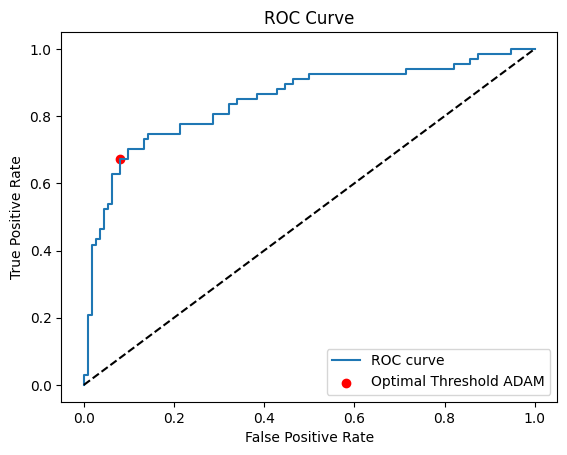

In [25]:
# Compute accuracy for each threshold
import sys
accuracies_adam = list()
#rint(mlp_adam.predict(test))
#y_pred = (y_pred_proba_adam >= 0.5).astype(int)

#print(y_pred)
#print(accuracy_score(y,y_pred))

for threshold in thresholds_adam:
    y_pred = (y_pred_proba_adam >= threshold).astype(int)
    accuracies_adam.append(accuracy_score(y_test, y_pred))
    #print(accuracy_score(y, y_pred), threshold)
    #print(y_pred)

# Find the threshold with the maximum accuracy
max_acc_adam_idx = np.argmax(accuracies_adam)
opt_thresh_adam = thresholds_adam[max_acc_adam_idx]
max_accuracy_adam = accuracies_adam[max_acc_adam_idx]


print(f'Optimal Threshold: {opt_thresh_adam}')
print(f'Maximum Accuracy: {max_accuracy_adam}')


plt.figure()
plt.plot(fpr_adam, tpr_adam, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_adam[max_acc_adam_idx], tpr_adam[max_acc_adam_idx], color='red', label='Optimal Threshold ADAM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

0.8212290502793296


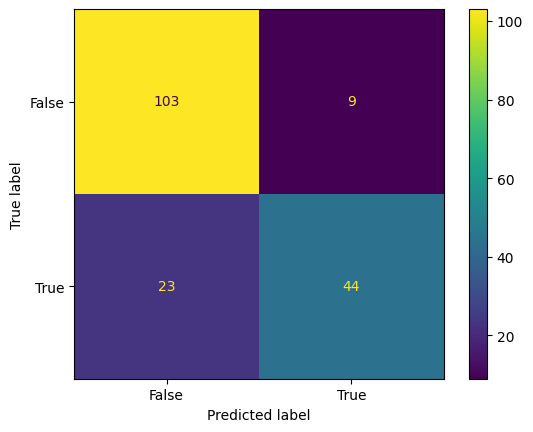

In [26]:
confusion_matrix_2 = metrics.confusion_matrix(y_test, (y_pred_proba_adam > opt_thresh_adam).astype(int))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [False, True])
#plt.title(' TEST DATA RESULT')
cm_display.plot()
print(accuracy_score(y_test, (y_pred_proba_adam > opt_thresh_adam).astype(int)))
plt.show()

In [27]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
PassengerId = test['PassengerId']
col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
test = test.loc[:, ~test.columns.isin(col)]

In [32]:
test.loc[:, 'Sex'] = test.loc[:, 'Sex'].replace({'male' : 1, 'female' : 0})
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [33]:
# Realizando o Encoder das variáveis categóricas de teste : 

encoded_df = pd.get_dummies(test['Embarked'], columns=['Embarked']).astype(int)

print(encoded_df.value_counts())

C  Q  S
0  0  1    270
1  0  0    102
0  1  0     46
Name: count, dtype: int64


In [34]:
test.drop(columns = ['Embarked'], inplace = True)
test = pd.concat([test, encoded_df], axis = 1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [35]:
# O KNN já foi definido no código acima, apenas iremos reutilizá-lo : 

test = pd.DataFrame(imputer.fit_transform(test), columns = test.columns)
test = test.astype(float)
test.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
dtype: int64

In [36]:
#scaler = MinMaxScaler()

#test_norm = scaler.fit_transform(test)
#test_norm = pd.DataFrame(test_norm, columns=test.columns)
#test_norm.head()

In [37]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3.0,1.0,34.1,0.0,0.0,8.0500,0.0,0.0,1.0
414,1.0,0.0,39.0,0.0,0.0,108.9000,1.0,0.0,0.0
415,3.0,1.0,38.5,0.0,0.0,7.2500,0.0,0.0,1.0
416,3.0,1.0,34.1,0.0,0.0,8.0500,0.0,0.0,1.0


In [38]:
# Escalonando os dados com o StandardScaler : 

scaler = StandardScaler()

test.loc[:, ['Age', 'Fare']] = scaler.fit_transform(test.loc[:, ['Age', 'Fare']])
test_norm = pd.DataFrame(test, columns=test.columns)
test_norm.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3.0,1.0,0.332234,0.0,0.0,-0.497562,0.0,1.0,0.0
1,3.0,0.0,1.295315,1.0,0.0,-0.512427,0.0,0.0,1.0
2,2.0,1.0,2.451013,0.0,0.0,-0.464248,0.0,1.0,0.0
3,3.0,1.0,-0.245615,0.0,0.0,-0.482623,0.0,0.0,1.0
4,3.0,0.0,-0.630848,1.0,1.0,-0.417637,0.0,0.0,1.0


In [39]:
# Escalonando os dados com o StandardScaler : 

#scaler = StandardScaler()
#test_norm = scaler.fit_transform(test)
#test_norm = pd.DataFrame(test_norm, columns=test.columns)
#test_norm.head()

#test = scaler.fit(

In [40]:
pred = mlp_adam.predict(test)
np.unique(pred, return_counts = True)

(array([0., 1.]), array([279, 139]))

In [41]:
pred

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [42]:
pred = mlp_adam.predict_proba(test)[:, 1]
pred = (pred >= opt_thresh_adam).astype(int)


pred_arr = np.column_stack((PassengerId, pred))

# Create the DataFrame
predictions_df = pd.DataFrame(pred_arr, columns=['PassengerId', 'Survived']).astype(int)
predictions_df.to_csv('predictions.csv', index=False)

In [43]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([281, 137]))

In [44]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,